1. Preparation

At this step I will import the data.

In [94]:
!pip install category_encoders

In [95]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import io
import os
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 500)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectPercentile, RFE
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score, RepeatedStratifiedKFold,\
StratifiedKFold
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder, RobustScaler, OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, PrecisionRecallDisplay, precision_recall_curve, confusion_matrix, recall_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import category_encoders as ce
from scipy import stats
from scipy.stats import chi2_contingency

In [96]:
df = pd.read_csv('Customer-Churn-Records.csv')

In [97]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [98]:
def report(df):
    col = []
    d_type = []
    uniques = []
    n_uniques = []

    for i in df.columns:
        col.append(i)
        d_type.append(df[i].dtypes)
        uniques.append(df[i].unique()[:5])
        n_uniques.append(df[i].nunique())

    return pd.DataFrame({'Column': col, 'd_type': d_type, 'unique_sample': uniques, 'n_uniques': n_uniques})


In [99]:
report(df)

,Column,d_type,unique_sample,n_uniques
0,RowNumber,int64,"[1, 2, 3, 4, 5]",10000
1,CustomerId,int64,"[15634602, 15647311, 15619304, 15701354, 15737...",10000
2,Surname,object,"[Hargrave, Hill, Onio, Boni, Mitchell]",2932
3,CreditScore,int64,"[619, 608, 502, 699, 850]",460
4,Geography,object,"[France, Spain, Germany]",3
5,Gender,object,"[Female, Male]",2
6,Age,int64,"[42, 41, 39, 43, 44]",70
7,Tenure,int64,"[2, 1, 8, 7, 4]",11
8,Balance,float64,"[0.0, 83807.86, 159660.8, 125510.82, 113755.78]",6382
9,NumOfProducts,int64,"[1, 3, 2, 4]",4


From the dataframe above, I will not use the CustomerId, RowNumber, Surname column because the it does not determine the probability that someone will churn or not.


In [100]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [101]:
# Menghapus kolom tanpa menggunakan inplace=True
df1 = df.drop(['CustomerId', 'RowNumber', 'Surname'], axis=1).copy()


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

We can see that there is not suspicious column

2. Exploratory Data Analysis

2.1 Churn Ratio

In [103]:
df['Exited'].value_counts()

Exited
0    7962
1    2038
Name: count, dtype: int64

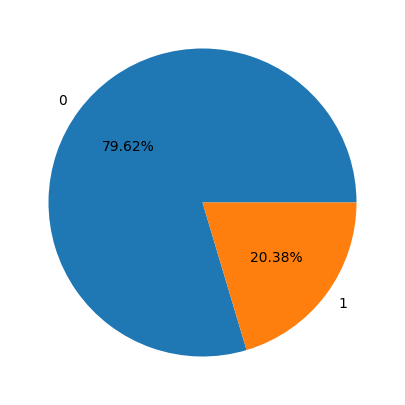

In [104]:
plt.figure(figsize=(10,5))
plt.pie(df['Exited'].value_counts(), labels=df['Exited'].value_counts().index, autopct='%.2f%%')
plt.show()

From pie chart above, we can see that 20.38% customers in this dataset labeled as churn customer. Meaning that this dataset is quite imbalanced between the churn and staying customer. To make a good resulted model, some will straightly think that this dataset needs to be resampled, or in other word, we should "balance" the label. But, up to this point, I still don't want to take that step. I will make another exploration to get more insights.

In [105]:
geo_vs_ex = df.groupby('Geography')['Exited'].value_counts().unstack().fillna(0)
geo_vs_ex = geo_vs_ex.round(2)
geo_vs_ex

Exited,0,1
Geography,,
France,4203,811
Germany,1695,814
Spain,2064,413


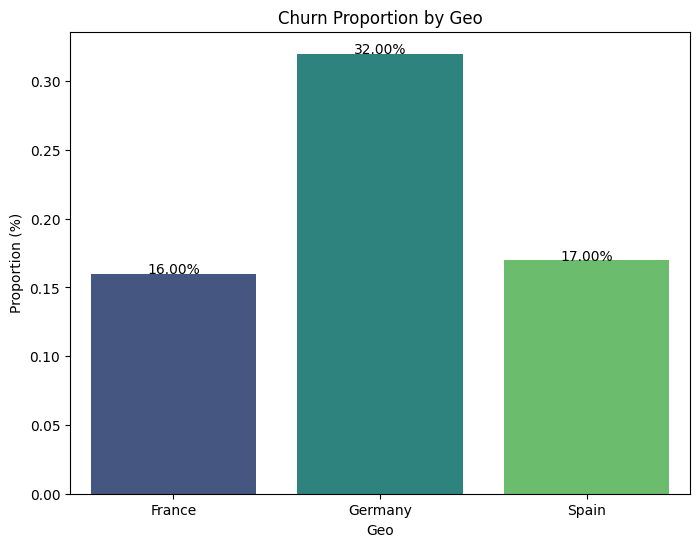

Geography has strong relationship with Churn label.


In [106]:
visual_geo_vs_ex = df.groupby('Geography')['Exited'].mean().reset_index()
visual_geo_vs_ex['Exited'] = visual_geo_vs_ex['Exited'].round(2)

plt.figure(figsize=(8, 6))
sns.barplot(x='Geography', y='Exited', data=visual_geo_vs_ex, palette='viridis')
plt.title('Churn Proportion by Geo')
plt.xlabel('Geo')
plt.ylabel('Proportion (%)')

for index, row in visual_geo_vs_ex.iterrows():
    plt.text(index, row['Exited'], f'{row["Exited"]*100:.2f}%', color='black', ha="center")

plt.show()

contingency_table = pd.crosstab(df['Geography'], df['Exited'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

alpha = 0.05
if p_value < alpha:
    print("Geography has strong relationship with Churn label.")
else:
    print("Geography has weak relationship with Churn label.")

In [107]:
gender_vs_ex = df.groupby('Gender')['Exited'].value_counts().unstack().fillna(0)
gender_vs_ex = gender_vs_ex.round(2)
gender_vs_ex

Exited,0,1
Gender,,
Female,3404,1139
Male,4558,899


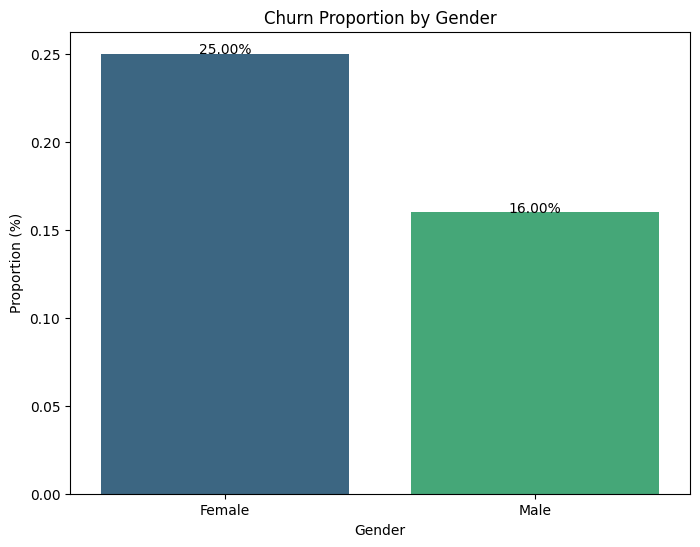

Gender has strong relationship with Churn label.


In [108]:
visual_gender_vs_ex = df.groupby('Gender')['Exited'].mean().reset_index()
visual_gender_vs_ex['Exited'] = visual_gender_vs_ex['Exited'].round(2)

plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Exited', data=visual_gender_vs_ex, palette='viridis')
plt.title('Churn Proportion by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion (%)')

for index, row in visual_gender_vs_ex.iterrows():
    plt.text(index, row['Exited'], f'{row["Exited"]*100:.2f}%', color='black', ha="center")

plt.show()

contingency_table = pd.crosstab(df['Gender'], df['Exited'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

alpha = 0.05
if p_value < alpha:
    print("Gender has strong relationship with Churn label.")
else:
    print("Gender has weak relationship with Churn label.")

In [109]:
card_vs_ex = df.groupby('Card Type')['Exited'].value_counts().unstack().fillna(0)
card_vs_ex = card_vs_ex.round(2)
card_vs_ex

Exited,0,1
Card Type,,
DIAMOND,1961,546
GOLD,2020,482
PLATINUM,1987,508
SILVER,1994,502


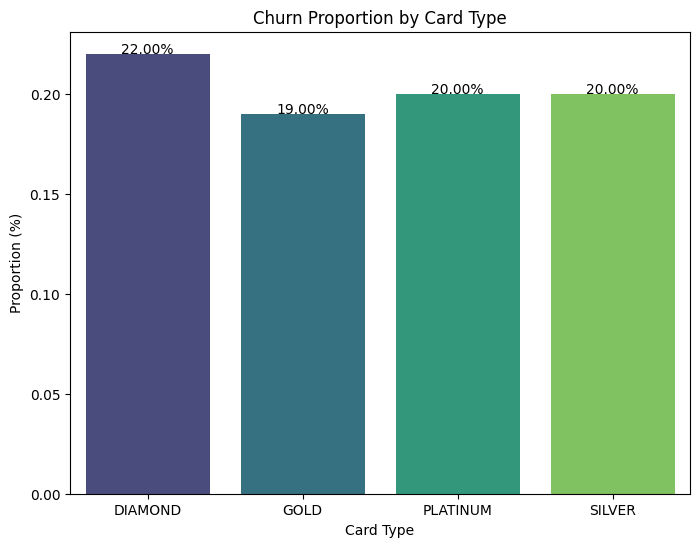

Card Type has weak relationship with Churn label.


In [110]:
visual_card_vs_ex = df.groupby('Card Type')['Exited'].mean().reset_index()
visual_card_vs_ex['Exited'] = visual_card_vs_ex['Exited'].round(2)

plt.figure(figsize=(8, 6))
sns.barplot(x='Card Type', y='Exited', data=visual_card_vs_ex, palette='viridis')
plt.title('Churn Proportion by Card Type')
plt.xlabel('Card Type')
plt.ylabel('Proportion (%)')

for index, row in visual_card_vs_ex.iterrows():
    plt.text(index, row['Exited'], f'{row["Exited"]*100:.2f}%', color='black', ha="center")

plt.show()

contingency_table = pd.crosstab(df['Card Type'], df['Exited'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

alpha = 0.05
if p_value < alpha:
    print("Card Type has strong relationship with Churn label.")
else:
    print("Card Type has weak relationship with Churn label.")

In [111]:
HasCrcard_vs_ex = df.groupby('HasCrCard')['Exited'].value_counts().unstack().fillna(0)
HasCrcard_vs_ex = HasCrcard_vs_ex.round(2)
HasCrcard_vs_ex

Exited,0,1
HasCrCard,,
0,2332,613
1,5630,1425


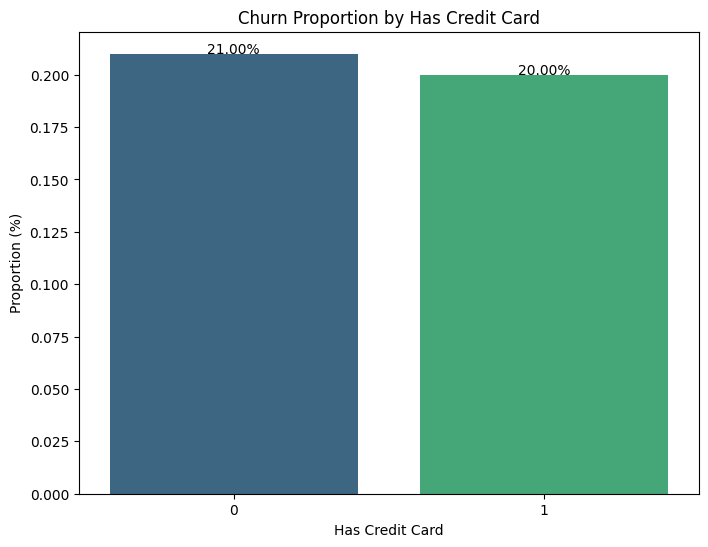

Has Credit Card has weak relationship with Churn label.


In [112]:
visual_HasCrcard_vs_ex = df.groupby('HasCrCard')['Exited'].mean().reset_index()
visual_HasCrcard_vs_ex['Exited'] = visual_HasCrcard_vs_ex['Exited'].round(2)

plt.figure(figsize=(8, 6))
sns.barplot(x='HasCrCard', y='Exited', data=visual_HasCrcard_vs_ex, palette='viridis')
plt.title('Churn Proportion by Has Credit Card')
plt.xlabel('Has Credit Card')
plt.ylabel('Proportion (%)')

for index, row in visual_HasCrcard_vs_ex.iterrows():
    plt.text(index, row['Exited'], f'{row["Exited"]*100:.2f}%', color='black', ha="center")

plt.show()

contingency_table = pd.crosstab(df['HasCrCard'], df['Exited'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

alpha = 0.05
if p_value < alpha:
    print("Has Credit Card has strong relationship with Churn label.")
else:
    print("Has Credit Card has weak relationship with Churn label.")

In [113]:
IsActiveMember_vs_ex = df.groupby('IsActiveMember')['Exited'].value_counts().unstack().fillna(0)
IsActiveMember_vs_ex = IsActiveMember_vs_ex.round(2)
IsActiveMember_vs_ex

Exited,0,1
IsActiveMember,,
0,3546,1303
1,4416,735


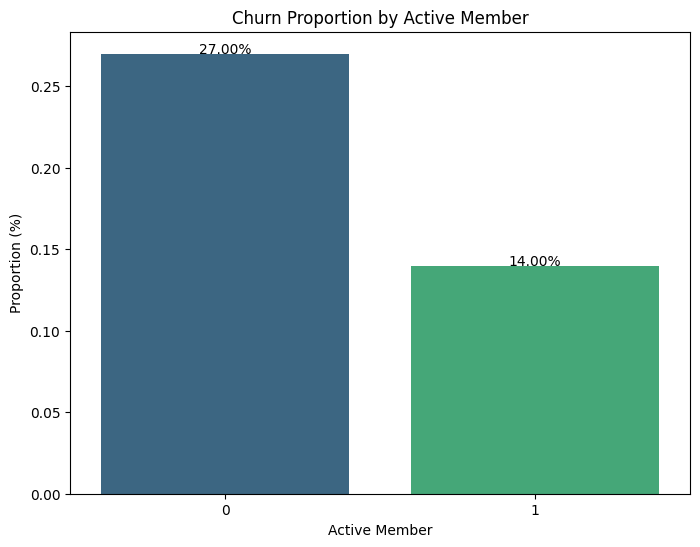

Active Member has strong relationship with Churn label.


In [114]:
visual_IsActiveMember_vs_ex = df.groupby('IsActiveMember')['Exited'].mean().reset_index()
visual_IsActiveMember_vs_ex['Exited'] = visual_IsActiveMember_vs_ex['Exited'].round(2)

plt.figure(figsize=(8, 6))
sns.barplot(x='IsActiveMember', y='Exited', data=visual_IsActiveMember_vs_ex, palette='viridis')
plt.title('Churn Proportion by Active Member')
plt.xlabel('Active Member')
plt.ylabel('Proportion (%)')

for index, row in visual_IsActiveMember_vs_ex.iterrows():
    plt.text(index, row['Exited'], f'{row["Exited"]*100:.2f}%', color='black', ha="center")

plt.show()

contingency_table = pd.crosstab(df['IsActiveMember'], df['Exited'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

alpha = 0.05
if p_value < alpha:
    print("Active Member has strong relationship with Churn label.")
else:
    print("Active Member has weak relationship with Churn label.")

In [115]:
Complain_vs_ex = df.groupby('Complain')['Exited'].value_counts().unstack().fillna(0)
Complain_vs_ex

Exited,0,1
Complain,,
0,7952,4
1,10,2034


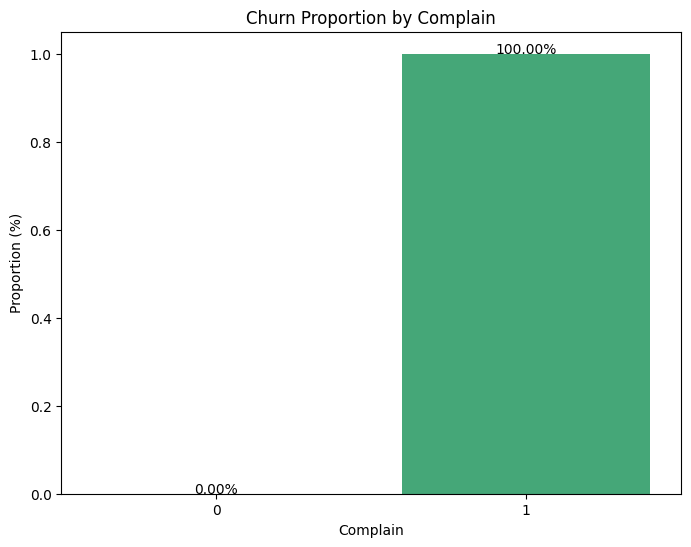

Complain has strong relationship with Churn label.


In [116]:
visual_Complain_vs_ex = df.groupby('Complain')['Exited'].mean().reset_index()
visual_Complain_vs_ex['Exited'] = visual_Complain_vs_ex['Exited'].round(2)

plt.figure(figsize=(8, 6))
sns.barplot(x='Complain', y='Exited', data=visual_Complain_vs_ex, palette='viridis')
plt.title('Churn Proportion by Complain')
plt.xlabel('Complain')
plt.ylabel('Proportion (%)')

for index, row in visual_Complain_vs_ex.iterrows():
    plt.text(index, row['Exited'], f'{row["Exited"]*100:.2f}%', color='black', ha="center")

plt.show()

contingency_table = pd.crosstab(df['Complain'], df['Exited'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

alpha = 0.05
if p_value < alpha:
    print("Complain has strong relationship with Churn label.")
else:
    print("Complain has weak relationship with Churn label.")

<Figure size 1000x600 with 0 Axes>

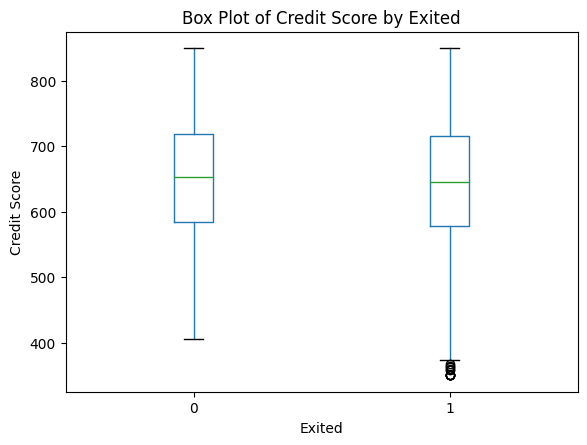

Credit Score has strong relationship with Churn label.


In [117]:
plt.figure(figsize=(10, 6))
df.boxplot(column='CreditScore', by='Exited', grid=False)
plt.title('Box Plot of Credit Score by Exited')
plt.suptitle('')
plt.xlabel('Exited')
plt.ylabel('Credit Score')
plt.show()

credit_score_exited = df[df['Exited'] == 1]['CreditScore']
credit_score_not_exited = df[df['Exited'] == 0]['CreditScore']
t_stat, p_value = stats.ttest_ind(credit_score_exited, credit_score_not_exited, equal_var=False)

alpha = 0.05
if p_value < alpha:
    print("Credit Score has strong relationship with Churn label.")
else:
    print("Credit Score has weak relationship with Churn label.")

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

<Figure size 1000x600 with 0 Axes>

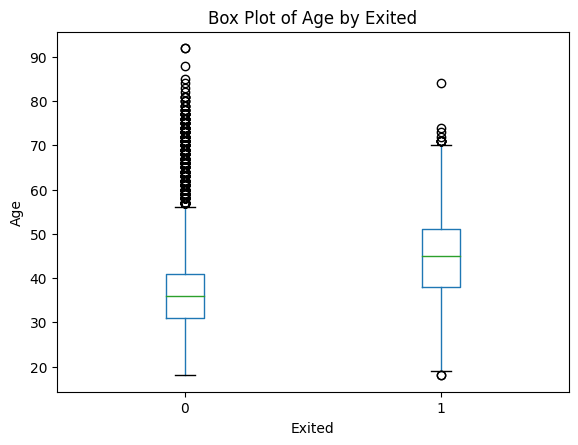

Age has strong relationship with Churn label.


In [119]:
plt.figure(figsize=(10, 6))
df.boxplot(column='Age', by='Exited', grid=False)
plt.title('Box Plot of Age by Exited')
plt.suptitle('')
plt.xlabel('Exited')
plt.ylabel('Age')
plt.show()

Age_exited = df[df['Exited'] == 1]['Age']
Age_not_exited = df[df['Exited'] == 0]['Age']
t_stat, p_value = stats.ttest_ind(Age_exited, Age_not_exited, equal_var=False)

alpha = 0.05
if p_value < alpha:
    print("Age has strong relationship with Churn label.")
else:
    print("Age has weak relationship with Churn label.")

<Figure size 1000x600 with 0 Axes>

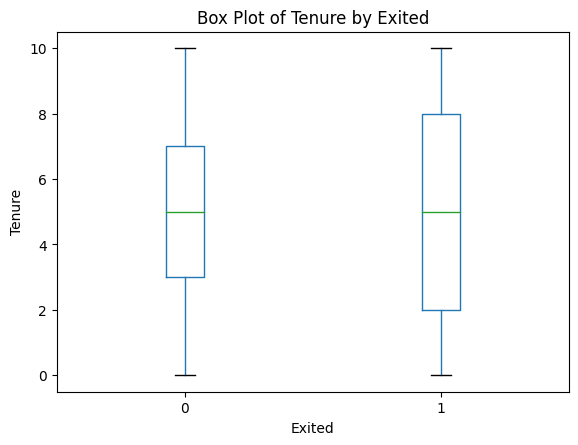

Tenure has weak relationship with Churn label.


In [120]:
plt.figure(figsize=(10, 6))
df.boxplot(column='Tenure', by='Exited', grid=False)
plt.title('Box Plot of Tenure by Exited')
plt.suptitle('')
plt.xlabel('Exited')
plt.ylabel('Tenure')
plt.show()

Tenure_exited = df[df['Exited'] == 1]['Tenure']
Tenure_not_exited = df[df['Exited'] == 0]['Tenure']
t_stat, p_value = stats.ttest_ind(Tenure_exited, Tenure_not_exited, equal_var=False)

alpha = 0.05
if p_value < alpha:
    print("Tenure has strong relationship with Churn label.")
else:
    print("Tenure has weak relationship with Churn label.")

<Figure size 1000x600 with 0 Axes>

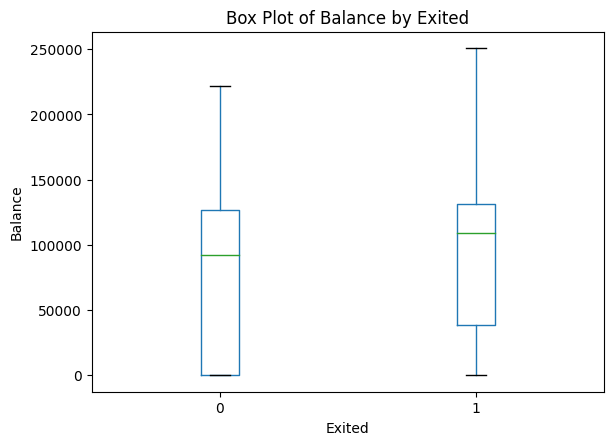

Balance has strong relationship with Churn label.


In [121]:
plt.figure(figsize=(10, 6))
df.boxplot(column='Balance', by='Exited', grid=False)
plt.title('Box Plot of Balance by Exited')
plt.suptitle('')
plt.xlabel('Exited')
plt.ylabel('Balance')
plt.show()

Balance_exited = df[df['Exited'] == 1]['Balance']
Balance_not_exited = df[df['Exited'] == 0]['Balance']
t_stat, p_value = stats.ttest_ind(Balance_exited, Balance_not_exited, equal_var=False)

alpha = 0.05
if p_value < alpha:
    print("Balance has strong relationship with Churn label.")
else:
    print("Balance has weak relationship with Churn label.")

<Figure size 1000x600 with 0 Axes>

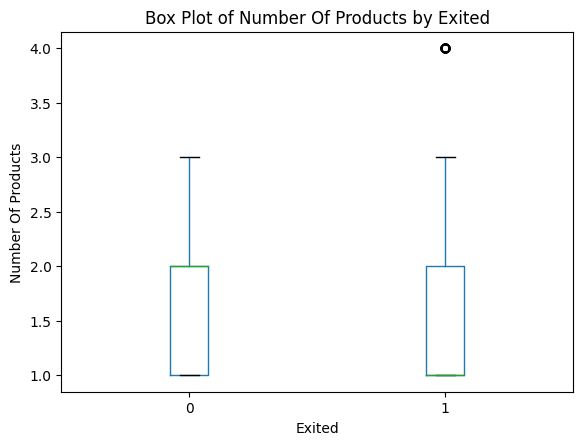

Number Of Products has strong relationship with Churn label.


In [122]:
plt.figure(figsize=(10, 6))
df.boxplot(column='NumOfProducts', by='Exited', grid=False)
plt.title('Box Plot of Number Of Products by Exited')
plt.suptitle('')
plt.xlabel('Exited')
plt.ylabel('Number Of Products')
plt.show()

NumOfProducts_exited = df[df['Exited'] == 1]['NumOfProducts']
NumOfProducts_not_exited = df[df['Exited'] == 0]['NumOfProducts']
t_stat, p_value = stats.ttest_ind(NumOfProducts_exited, NumOfProducts_not_exited, equal_var=False)

alpha = 0.05
if p_value < alpha:
    print("Number Of Products has strong relationship with Churn label.")
else:
    print("Number Of Products has weak relationship with Churn label.")

<Figure size 1000x600 with 0 Axes>

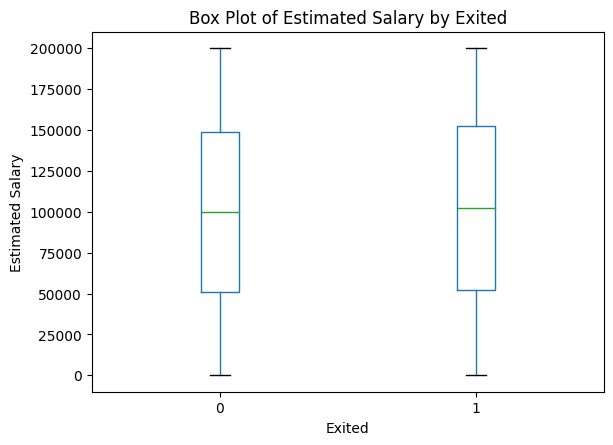

Estimated Salary has weak relationship with Churn label.


In [123]:
plt.figure(figsize=(10, 6))
df.boxplot(column='EstimatedSalary', by='Exited', grid=False)
plt.title('Box Plot of Estimated Salary by Exited')
plt.suptitle('')
plt.xlabel('Exited')
plt.ylabel('Estimated Salary')
plt.show()

EstimatedSalary_exited = df[df['Exited'] == 1]['EstimatedSalary']
EstimatedSalary_not_exited = df[df['Exited'] == 0]['EstimatedSalary']
t_stat, p_value = stats.ttest_ind(EstimatedSalary_exited, EstimatedSalary_not_exited, equal_var=False)

alpha = 0.05
if p_value < alpha:
    print("Estimated Salary has strong relationship with Churn label.")
else:
    print("Estimated Salary has weak relationship with Churn label.")

<Figure size 1000x600 with 0 Axes>

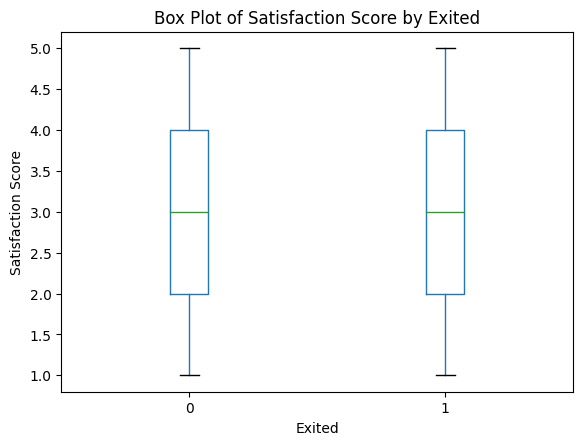

Satisfaction Score has weak relationship with Churn label.


In [124]:
plt.figure(figsize=(10, 6))
df.boxplot(column='Satisfaction Score', by='Exited', grid=False)
plt.title('Box Plot of Satisfaction Score by Exited')
plt.suptitle('')
plt.xlabel('Exited')
plt.ylabel('Satisfaction Score')
plt.show()

Satisfaction_Score_exited = df[df['Exited'] == 1]['Satisfaction Score']
Satisfaction_Score_not_exited = df[df['Exited'] == 0]['Satisfaction Score']
t_stat, p_value = stats.ttest_ind(Satisfaction_Score_exited, Satisfaction_Score_not_exited, equal_var=False)

alpha = 0.05
if p_value < alpha:
    print("Satisfaction Score has strong relationship with Churn label.")
else:
    print("Satisfaction Score has weak relationship with Churn label.")

<Figure size 1000x600 with 0 Axes>

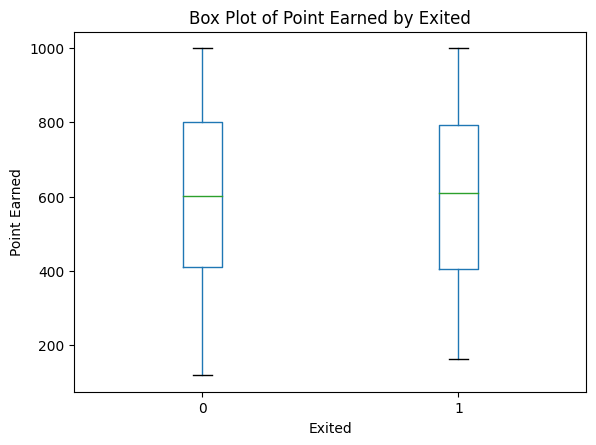

Point Earned has weak relationship with Churn label.


In [125]:
plt.figure(figsize=(10, 6))
df.boxplot(column='Point Earned', by='Exited', grid=False)
plt.title('Box Plot of Point Earned by Exited')
plt.suptitle('')
plt.xlabel('Exited')
plt.ylabel('Point Earned')
plt.show()

Point_Earned_exited = df[df['Exited'] == 1]['Point Earned']
Point_Earned_not_exited = df[df['Exited'] == 0]['Point Earned']
t_stat, p_value = stats.ttest_ind(Point_Earned_exited, Point_Earned_not_exited, equal_var=False)

alpha = 0.05
if p_value < alpha:
    print("Point Earned has strong relationship with Churn label.")
else:
    print("Point Earned has weak relationship with Churn label.")

<Axes: >

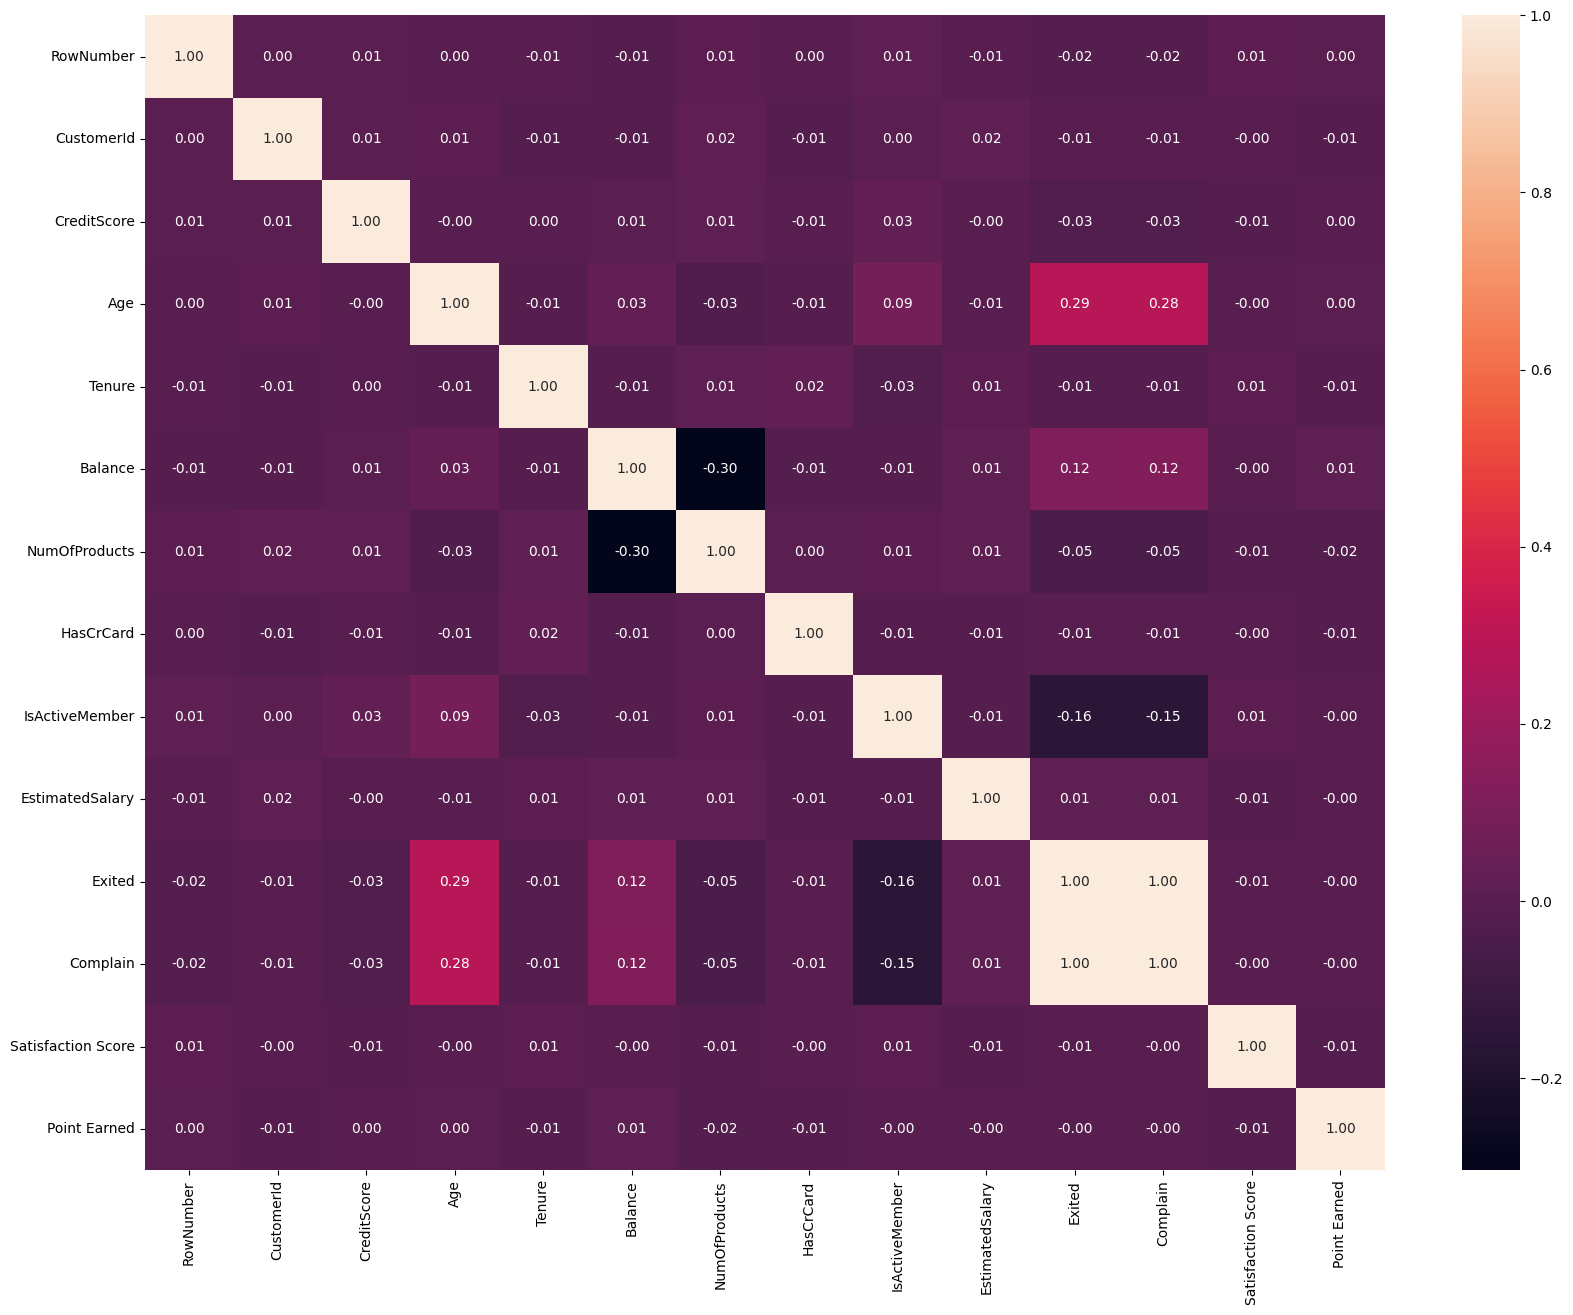

In [126]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.select_dtypes(exclude='object').corr(), annot=True, fmt=".2f")

3. Machine Learning Model

For the modelling stage, this churn prediction will focus on as much as possible in predicting which customers will churn. As we know, if this model predicts 'retain' for a customer that will actually 'churn', then we will lose the customer. And according to some opinions, the cost of customer acquisition is 7 times greater than the cost of retaining the customer.

So that in modeling this time we will focus on Recall Score. And we will try to use PR (Precision Recall) Curve to find the optimum threshold.

3.1 Strategy

In the modelling step, I will use Pipeline to help me building the model. First of all, I will divide the data into two category:

Categorical Variable
Quantitative Variable

Categorical variable is a data that take category or label values. In the other hands, quantitative variable take numerical values and represent some kind of measurement.

There are 7 columns that I listed as categorical variable. And since most of them only have maximum 4 unique values, and each value has no order with each other, I will encode them using One-Hot Encoding.

The rest of the columns should be listed in the other category, and since each column has big different in value range with each other, so I will try to scale them using Min-Max Scaler or Standard Scaler.

Since there are no missing values, then I don't need imputer in this process.

The first model that I will use is Logistic Regression. After that, if needed, I will try to use Deep Learning method to build the model.

In [127]:
X = df1.drop(columns=['Exited', 'Complain'])
y = df1['Exited']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, stratify=y, random_state=42)

In [128]:
X_train.shape

(8000, 13)

In [129]:
X_test.shape

(2000, 13)

4.2 Initiating Pipeline

4.2.1 Logistic Regression

In [130]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

In [131]:
one_hot_cols = X.select_dtypes(include='object').columns
numeric_cols = X.select_dtypes(exclude='object').columns
logit = LogisticRegression(random_state=42)
smote = SMOTE(random_state=42)

logit_pipe_num = Pipeline([
    ('imputer', SimpleImputer(strategy='median', missing_values=np.nan)),
    ('scaler', RobustScaler()),
])

# for all object columns
logit_pipe_cat = Pipeline([
    ('onehot', OneHotEncoder(drop='first')),
])

# transforming all columns
logit_transformer = ColumnTransformer([
    ('pipe_num', logit_pipe_num, numeric_cols),
    ('pipe_cat', logit_pipe_cat, one_hot_cols)
])

# combine all pipeline
logit_pipe_combine = Pipeline([
    ('transformer', logit_transformer),
    ('resampling', smote),
    ('logit', logit)
])

In [132]:
skf = StratifiedKFold(n_splits=5)

logit_score = cross_val_score(logit_pipe_combine, X_train, y_train, scoring='recall', cv=skf, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.1s finished


In [133]:
logit_score

array([0.69631902, 0.67177914, 0.67177914, 0.66871166, 0.67177914])

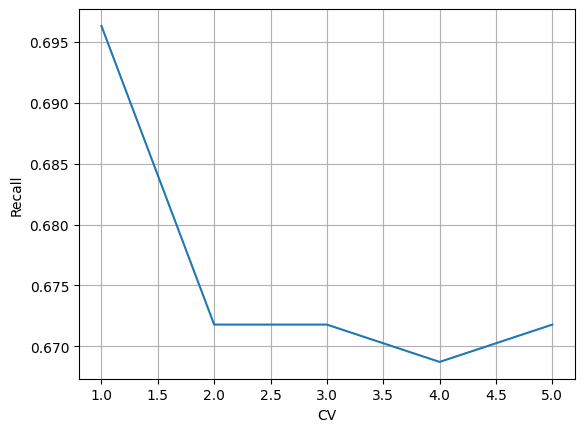

Logit Val Score: 0.6760736196319018


In [134]:
plt.plot(range(1, len(logit_score)+1), logit_score)
plt.xlabel('CV')
plt.ylabel('Recall')
plt.grid()
plt.show()
print('Logit Val Score:', logit_score.mean())

In [135]:
logit_pipe_combine.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Satisfaction Score',
       'Point Earned'],
      dtype='object')),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  Index(['Geography', 'Gender', 'Card Type'], dtype='object'))])),
                ('resampling', SMOTE(random_state=42)),
                ('logit', LogisticRegression(random_state=42))])

In [136]:
recall_score(y_test,logit_pipe_combine.predict(X_test))

0.7156862745098039

In [137]:
recall_score(y_train,logit_pipe_combine.predict(X_train))

0.6895705521472393

The score of this model is still very low. The score we expect from the machine learning model calculation is around 85%.

5. Add new Features

Here, we will add features using feature engineering. The features we want to include in the model are:

Age Group,
Balance Salary Ratio,
Products per Year,
Unhappy Complain,
Loyalty Score,
Engagement Score,
Customer Lifetime Value,
Credit Score Group,
Activity Level,
Satisfaction Category,
Income Level,
Tenure Group,
Point Earned Category

In [138]:

def age_group(age):
    if age < 25:
        return 'Young'
    elif 25 <= age < 40:
        return 'Adult'
    elif 40 <= age < 60:
        return 'Middle-aged'
    else:
        return 'Senior'

df1['AgeGroup'] = df1['Age'].apply(age_group)


In [139]:
df1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,AgeGroup
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,Middle-aged
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,Middle-aged
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,Middle-aged
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,Adult
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,Middle-aged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300,Adult
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771,Adult
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564,Adult
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339,Middle-aged


In [140]:
df1['BalanceSalaryRatio'] = df1['Balance'] / df1['EstimatedSalary']
df1['ProductsPerYear'] = df1['NumOfProducts'] / (df1['Tenure'] + 1)
df1['UnhappyComplain'] = ((df1['Complain'] == 1) & (df1['Satisfaction Score'] <= 2)).astype(int)
df1['LoyaltyScore'] = df1['Tenure'] * df1['NumOfProducts']
df1['EngagementScore'] = df1['IsActiveMember'] * df1['NumOfProducts'] * df1['Satisfaction Score']
df['CustomerLifetimeValue'] = df['Tenure'] * df['NumOfProducts'] * df['EstimatedSalary']

In [141]:
def credit_score_bin(score):
    if score < 600:
        return 'Low'
    elif 600 <= score < 700:
        return 'Medium'
    elif 700 <= score < 800:
        return 'High'
    else:
        return 'Very High'

df1['CreditScoreBin'] = df1['CreditScore'].apply(credit_score_bin)


In [142]:
def activity_level(row):
    if row['IsActiveMember'] == 1 and row['NumOfProducts'] > 2:
        return 'Highly Active'
    elif row['IsActiveMember'] == 1:
        return 'Active'
    else:
        return 'Inactive'

df1['ActivityLevel'] = df1.apply(activity_level, axis=1)


In [143]:
def satisfaction_category(score):
    if score <= 2:
        return 'Low Satisfaction'
    elif score <= 4:
        return 'Medium Satisfaction'
    else:
        return 'High Satisfaction'

df1['SatisfactionCategory'] = df1['Satisfaction Score'].apply(satisfaction_category)


In [144]:
def income_level(salary):
    if salary < 50000:
        return 'Low'
    elif 50000 <= salary < 100000:
        return 'Medium'
    else:
        return 'High'

df['IncomeLevel'] = df['EstimatedSalary'].apply(income_level)


In [145]:
def tenure_group(tenure):
    if tenure < 3:
        return 'New'
    elif 3 <= tenure < 7:
        return 'Intermediate'
    else:
        return 'Experienced'

df['TenureGroup'] = df['Tenure'].apply(tenure_group)


In [146]:
def point_earned_category(points):
    if points < 300:
        return 'Low'
    elif 300 <= points < 400:
        return 'Medium'
    else:
        return 'High'

df['PointEarnedCategory'] = df['Point Earned'].apply(point_earned_category)


In [147]:
df1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,AgeGroup,BalanceSalaryRatio,ProductsPerYear,UnhappyComplain,LoyaltyScore,EngagementScore,CreditScoreBin,ActivityLevel,SatisfactionCategory
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,Middle-aged,0.000000,0.333333,1,2,2,Medium,Active,Low Satisfaction
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,Middle-aged,0.744677,0.500000,0,1,3,Medium,Active,Medium Satisfaction
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,Middle-aged,1.401375,0.333333,0,24,0,Low,Inactive,Medium Satisfaction
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,Adult,0.000000,1.000000,0,2,0,Medium,Inactive,High Satisfaction
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,Middle-aged,1.587055,0.333333,0,2,5,Very High,Active,High Satisfaction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300,Adult,0.000000,0.333333,0,10,0,High,Inactive,Low Satisfaction
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771,Adult,0.564108,0.090909,0,10,5,Low,Active,High Satisfaction
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564,Adult,0.000000,0.125000,0,7,3,High,Active,Medium Satisfaction
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339,Middle-aged,0.808230,0.500000,1,6,0,High,Inactive,Low Satisfaction


Let's re-examine the correlation between features to see if there are any indications of multicollinearity after adding the new feature.

<Axes: >

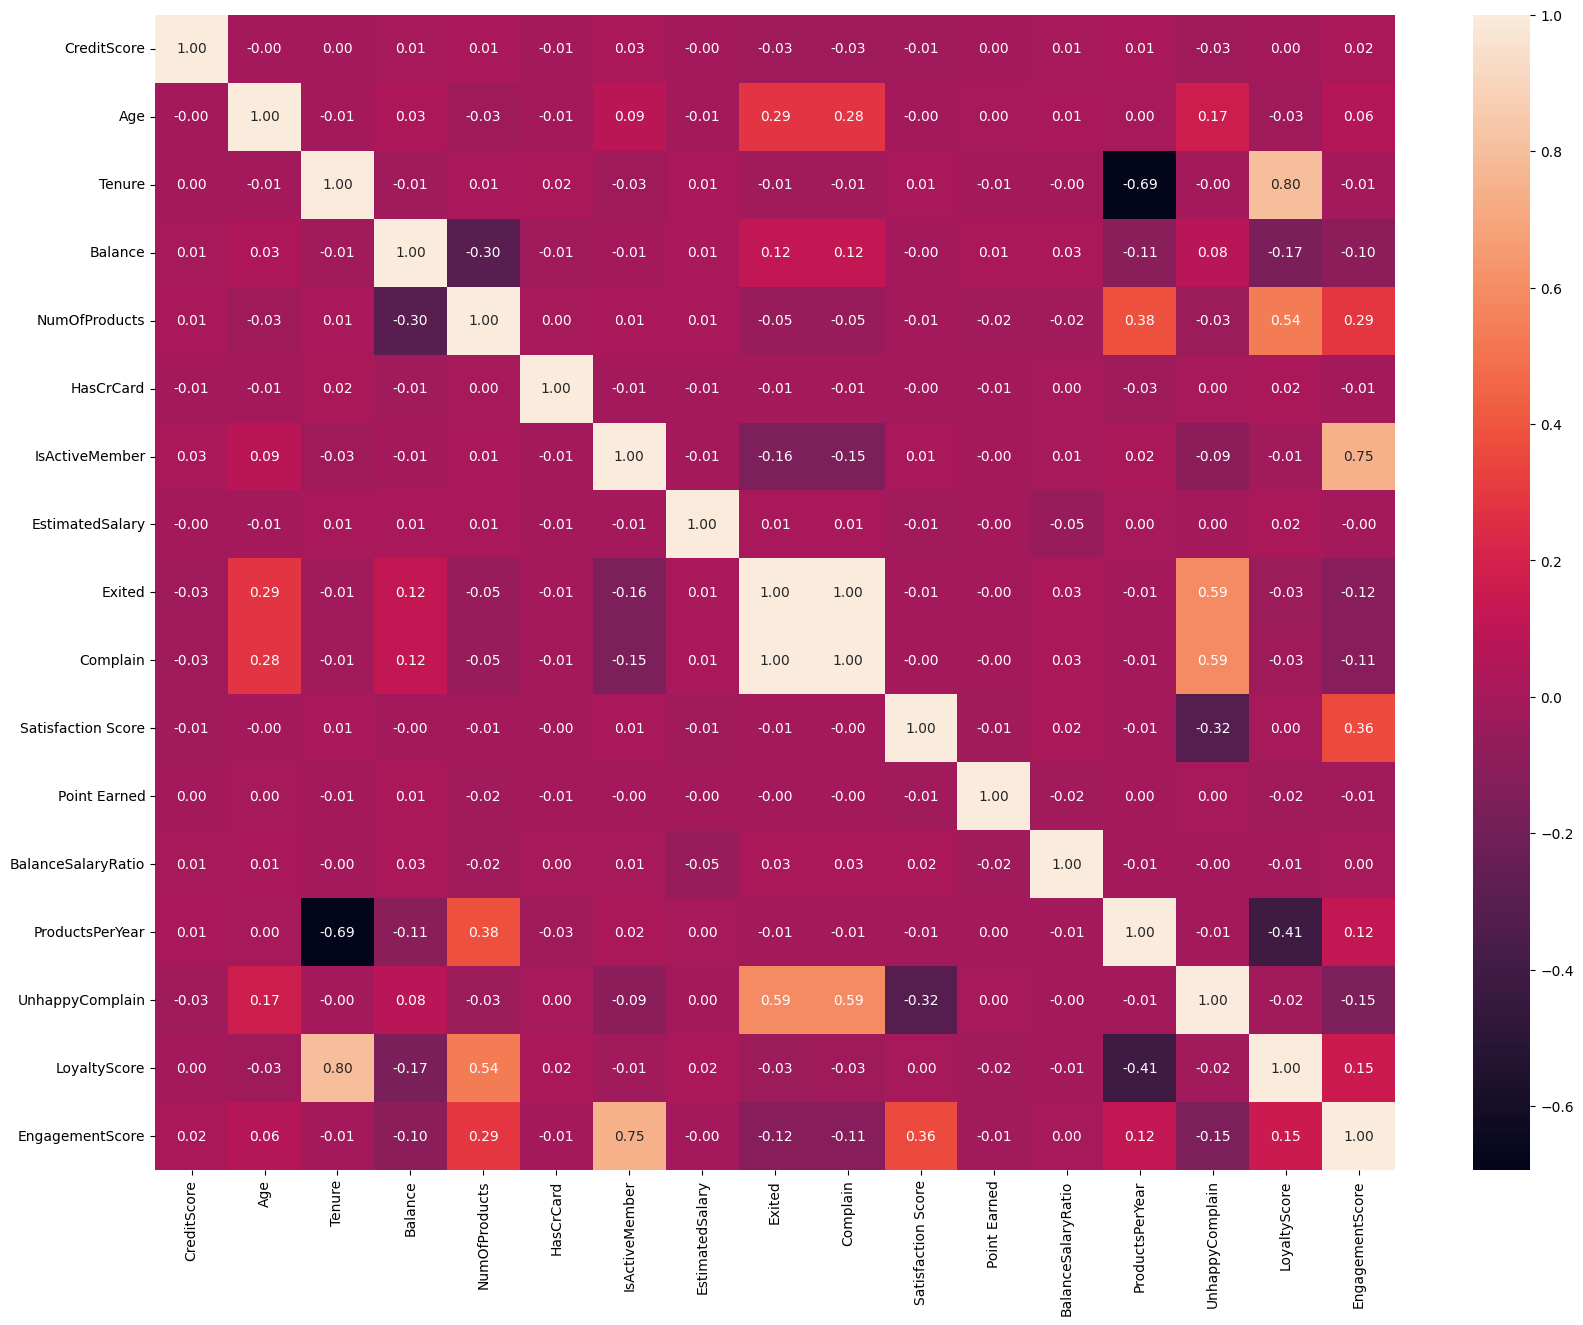

In [148]:
plt.figure(figsize=(20, 15))
sns.heatmap(df1.select_dtypes(exclude='object').corr(), annot=True, fmt=".2f")

It was found that there are multicollinear features, so we will remove those features. The features to be removed are Complain, Tenure, and Engagement Score.

In [149]:
X = df1.drop(columns=['Exited', 'Complain', 'Tenure', 'EngagementScore'])
y = df1['Exited']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, stratify=y, random_state=42)

In [150]:
one_hot_cols = X.select_dtypes(include='object').columns
numeric_cols = X.select_dtypes(exclude='object').columns
logit = LogisticRegression(random_state=42)
smote = SMOTE(random_state=42)

logit_pipe_num = Pipeline([
    ('imputer', SimpleImputer(strategy='median', missing_values=np.nan)),
    ('scaler', RobustScaler())
])

logit_pipe_cat = Pipeline([
    ('onehot', OneHotEncoder(drop='first')),
])


logit_transformer = ColumnTransformer([
    ('pipe_num', logit_pipe_num, numeric_cols),
    ('pipe_cat', logit_pipe_cat, one_hot_cols)
])

logit_pipe_combine = Pipeline([
    ('transformer', logit_transformer),
    ('resampling', smote),
    ('logit', logit)
])

Let's perform the calculations again using the logistic regression model.

In [151]:
skf = StratifiedKFold(n_splits=5)

logit_score = cross_val_score(logit_pipe_combine, X_train, y_train, scoring='recall', cv=skf, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.0s finished


In [152]:
logit_score

array([0.79141104, 0.85276074, 0.82208589, 0.81595092, 0.78220859])

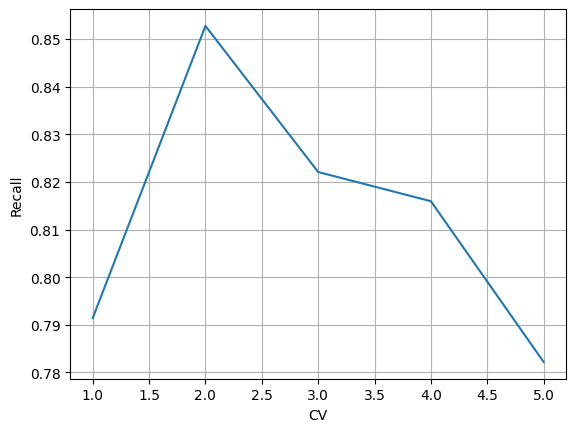

Logit Val Score: 0.8128834355828222


In [153]:
plt.plot(range(1, len(logit_score)+1), logit_score)
plt.xlabel('CV')
plt.ylabel('Recall')
plt.grid()
plt.show()
print('Logit Val Score:', logit_score.mean())

In [154]:
logit_pipe_combine.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Satisfaction Score',
       'Point Earned', 'BalanceSalaryRatio', 'ProductsPerYear',
       'UnhappyComplain', 'LoyaltyScore'],
      dtype='object')),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  Index(['Geography', 'Gender', 'Card Type', 'AgeGroup', 'CreditScoreBin',
       'ActivityLevel', 'SatisfactionCategory'],
      dtype='object'))])),
                ('resampling', SMOTE(random_state=42)),
                ('logit', LogisticRegression(random_state=42))])

In [155]:
recall_score(y_test,logit_pipe_combine.predict(X_test))

0.8700980392156863

In [156]:
recall_score(y_train,logit_pipe_combine.predict(X_train))

0.8208588957055215

It can be seen that the score has improved since adding the new feature. We will also try using the XGBoost model to see if its performance can provide better results.

6. Model Machine Learning XGBOOST

In [157]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import recall_score
from imblearn.pipeline import Pipeline as ImbalancedPipeline
from xgboost import XGBClassifier

one_hot_cols = X.select_dtypes(include='object').columns
numeric_cols = X.select_dtypes(exclude='object').columns

xgb_pipe_num = Pipeline([
    ('imputer', SimpleImputer(strategy='median', missing_values=np.nan)),
    ('scaler', RobustScaler())
])

xgb_pipe_cat = Pipeline([
    ('onehot', OneHotEncoder(drop='first')),
])

xgb_transformer = ColumnTransformer([
    ('pipe_num', xgb_pipe_num, numeric_cols),
    ('pipe_cat', xgb_pipe_cat, one_hot_cols)
])

xgb = XGBClassifier(
    random_state=42,
    eval_metric='logloss'
)

xgb_pipe_combine = ImbPipeline([
    ('transformer', xgb_transformer),
    ('resampling', SMOTE(random_state=42)),
    ('xgb', xgb)
])

We will proceed with hyperparameter tuning here to improve the performance of the XGBoost model.

In [158]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'xgb__n_estimators': [50, 100, 150],
    'xgb__learning_rate': np.linspace(0.01, 0.1, 10),
    'xgb__max_depth': [3, 4],
    'xgb__subsample': np.linspace(0.6, 0.9, 4),
    'xgb__colsample_bytree': np.linspace(0.6, 0.9, 4),
    'xgb__gamma': np.linspace(0, 0.5, 6),
    'xgb__min_child_weight': [3, 4],
    'xgb__scale_pos_weight': [1, 2],
    'xgb__lambda': [0.1, 0.5]
}

random_search = RandomizedSearchCV(
    estimator=xgb_pipe_combine,
    param_distributions=param_dist,
    n_iter=50,
    scoring='recall',
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=2
)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_score = random_search.best_score_

y_pred = random_search.predict(X_test)
test_score = recall_score(y_test, y_pred)

print(f"Best Parameters: {best_params}")
print(f"Best Training Recall Score: {best_score}")
print(f"Test Recall Score: {test_score}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'xgb__subsample': 0.8, 'xgb__scale_pos_weight': 2, 'xgb__n_estimators': 50, 'xgb__min_child_weight': 3, 'xgb__max_depth': 3, 'xgb__learning_rate': 0.020000000000000004, 'xgb__lambda': 0.5, 'xgb__gamma': 0.1, 'xgb__colsample_bytree': 0.7}
Best Training Recall Score: 0.9680981595092024
Test Recall Score: 0.9681372549019608


The recall score for both the training and test data is very good here. There is no indication of overfitting or underfitting.

Next, we will calculate the confusion matrix to make business decisions.

In [159]:
from sklearn.metrics import precision_score, f1_score, roc_auc_score, confusion_matrix, classification_report

y_pred = random_search.best_estimator_.predict(X_test)

roc_auc = roc_auc_score(y_test, y_pred)

print(f"ROC-AUC Score: {roc_auc:.4f}")

cm = confusion_matrix(y_test, y_pred)



ROC-AUC Score: 0.7843


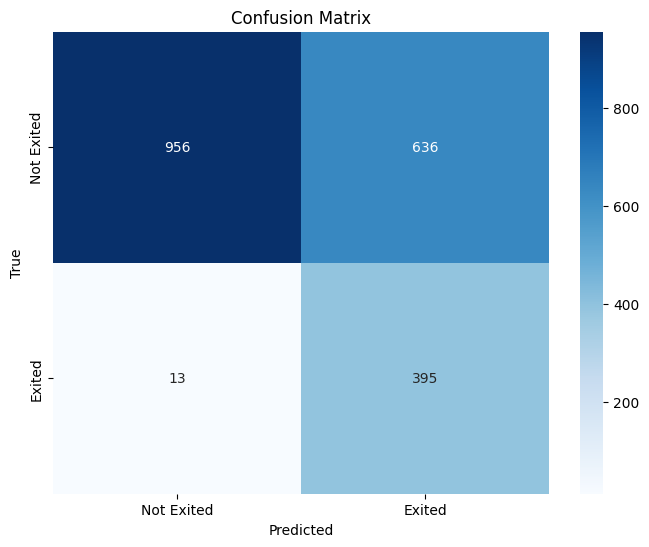

In [160]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Exited', 'Exited'],
            yticklabels=['Not Exited', 'Exited'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
